<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tools-for-text-processing" data-toc-modified-id="Tools-for-text-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tools for text processing</a></span></li><li><span><a href="#Request-Moby-Dick" data-toc-modified-id="Request-Moby-Dick-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Request Moby Dick</a></span></li><li><span><a href="#Get-the-text-from-the-HTML" data-toc-modified-id="Get-the-text-from-the-HTML-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the text from the HTML</a></span></li><li><span><a href="#Extract-the-words" data-toc-modified-id="Extract-the-words-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extract the words</a></span></li><li><span><a href="#Make-the-words-lowercase" data-toc-modified-id="Make-the-words-lowercase-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make the words lowercase</a></span></li><li><span><a href="#Load-in-stop-words" data-toc-modified-id="Load-in-stop-words-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load in stop words</a></span></li><li><span><a href="#Remove-stop-words-in-Moby-Dick" data-toc-modified-id="Remove-stop-words-in-Moby-Dick-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove stop words in Moby Dick</a></span></li><li><span><a href="#We-have-the-answer" data-toc-modified-id="We-have-the-answer-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>We have the answer</a></span></li><li><span><a href="#The-most-common-word" data-toc-modified-id="The-most-common-word-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>The most common word</a></span></li><li><span><a href="#Put-all-into-a-single-function" data-toc-modified-id="Put-all-into-a-single-function-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Put all into a single function</a></span></li></ul></div>

## Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>). </p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>
<p>Let's start by loading in the three main python packages we are going to use.</p>

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests #  to fetch the html file that contains the book.
from bs4 import BeautifulSoup #  to extract the words from the html file.
import nltk #  to analyze the word frequencies.

This Project is based on a live screencast by DataCamp's own Hugo Bowne-Anderson. When you've finished the Project, or if you get stuck, do check out the screencast with Hugo's solution (the screencast starts 12 minutes into the video). You can also find Hugo's solution notebook here. https://www.facebook.com/726282547396228/videos/1762301357127670/
<br>solution: https://github.com/datacamp/datacamp_facebook_live_nlp/blob/master/NLP_FB_live_coding_soln_verbose.ipynb 

## Request Moby Dick
<p>To analyze Moby Dick, we need to get the contents of Moby Dick from <em>somewhere</em>. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .</p>
<p><strong>Note</strong> that HTML stands for Hypertext Markup Language and is the standard markup language for the web.</p>
<p>To fetch the HTML file with Moby Dick we're going to use the <code>request</code> package to make a <code>GET</code> request for the website, which means we're <em>getting</em> data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into python instead. </p>

In [2]:
# Getting the Moby Dick HTML 
r = requests.get("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:200])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/


## Get the text from the HTML
<p>This HTML is not quite what we want. However, it does <em>contain</em> what we want: the text of <em>Moby Dick</em>. What we need to do now is <em>wrangle</em> this HTML to extract the text of the novel. For this we'll use the package <code>BeautifulSoup</code>.</p>
<p>Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called <code>BeautifulSoup</code>. After creating the soup, we can use its <code>.get_text()</code> method to extract the text.</p>

In [11]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 32500
print(text[32000:32500])

tly over him, and probably killed him in a moment.”
         —“The Whale and his Captors, or The Whaleman’s Adventures and the
        Whale’s Biography, gathered on the Homeward Cruise of the Commodore
        Preble.” By Rev. Henry T. Cheever.
      
      
        “If you make the least damn bit of noise,” replied Samuel, “I will send
        you to hell.” —Life of Samuel Comstock (the mutineer), by his
        brother, William Comstock. Another Version of the whale-ship Globe
        narrati


In [12]:
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

In [13]:
# Get hyperlinks from soup and check out first 5
soup.findAll('a')[:5]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>]

In [14]:
import re
sentence = 'peter piper pick a peck of pickled peppers'

# Find all words in sentence that start with p
re.findall('p\w+', sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [15]:
# Find all words in the sentence and print them
sentence = 'peter piper pick a peck of pickled peppers'
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

## Extract the words
<p>We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

The <code>nltk.tokenize.RegexpTokenizer</code> function requires a regular expression, or regexp for short, as its first argument. You want to match everything that is a `word` and the regexp that does this is '\w+'. 
- The '\w' is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores.
- The '+' tells you that the previous character in the regexp can appear as many times as you want in strings that you're trying to match.
- This means that '\w+' will match arbitrary sequences of alphanumeric characters and underscores.

In [5]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

## Make the words lowercase
<p>OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in <em>Moby Dick</em> in which all capital letters have been made lower case.</p>

In [6]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

In [16]:
# do the same with list comprehension
words2 = [t.lower() for t in tokens]
words2[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

## Load in stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use.</p>

In [7]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words("english")

# Printing out the first eight stop words
sw[:8]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

## Remove stop words in Moby Dick
<p>We now want to create a new list with all <code>words</code> in Moby Dick, except those that are stop words (that is, those words listed in <code>sw</code>). One way to get this list is to loop over all elements of <code>words</code> and add each word to a new list if they are <em>not</em> in <code>sw</code>.</p>

In [8]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
words_ns[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

In [17]:
# do the same with list comprehension
x = [w for w in words if w not in sw]
x[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

## We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>
</blockquote>
<p>We are now ready to answer that! Let's create a word frequency distribution plot using <code>nltk</code>. </p>

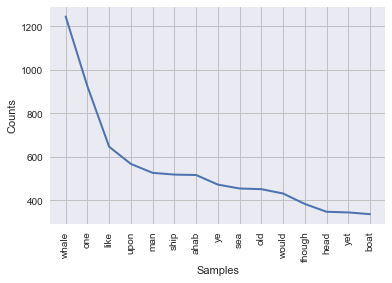

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution, i.e. 15 most frequent words
freqdist.plot(15)

## The most common word
<p>Nice! The frequency distribution plot above is the answer to our question. </p>
<p>The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text. </p>
<p>So, what word turned out to (<em>not surprisingly</em>) be the most common word in Moby Dick?</p>

In [ ]:
# What's the most common word in Moby Dick?
most_common_word = 'whale'

## Put all into a single function

In [46]:
from nltk.tokenize import RegexpTokenizer
def plot_word_freq1(url, nr = 15):
    """Takes a url (from Project Gutenberg) and plots a word frequency distribution"""
    r = requests.get(url) # Make the request and check object type
    html = r.text # Extract HTML from Response object
    soup = BeautifulSoup(html, "html5lib") # Create a BeautifulSoup object from the HTML
    text = soup.get_text() # Get the text out of the soup
    tokens = RegexpTokenizer('\w+').tokenize(text) # Create tokens
    words = [t.lower() for t in tokens] # make tokens lower case
    words = [t for t in words if t.isalpha()] # removes numbers and punctuation
    words_ns = [w for w in words if w not in nltk.corpus.stopwords.words('english')] # remove stopwords
    freqdist1 = nltk.FreqDist(words_ns) # Create freq dist and plot
    freqdist1.plot(nr) # plot 15 most frequent words

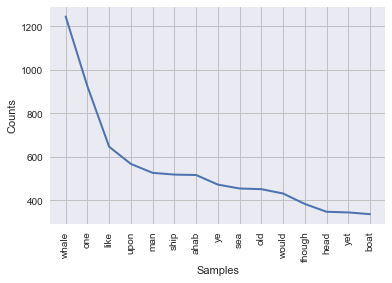

In [59]:
# Pride and Prejudice:
# plot_word_freq1('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm') # not working for DE
plot_word_freq1("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

In [24]:
# now the same by using books without downloading
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [28]:
print(text2[:100])

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.', 'The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion']


In [30]:
# it's already tokenized
def plot_word_freq(text):
    """Takes 1 of 9 nltk books and plots a word frequency distribution"""
    words = [t.lower() for t in text] # make tokens lower case
    words = [t for t in words if t.isalpha()] # removes numbers and punctuation
    words_ns = [w for w in words if w not in nltk.corpus.stopwords.words('english')] # remove stopwords
    freqdist1 = nltk.FreqDist(words_ns) # Create freq dist and plot
    freqdist1.plot(15) # plot 15 most frequent words

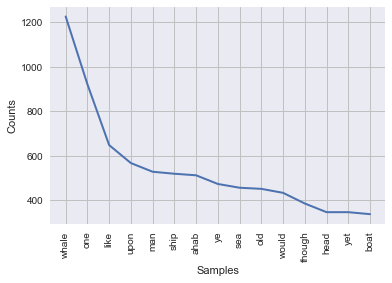

In [31]:
plot_word_freq(text1)

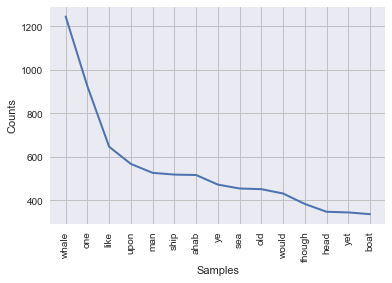

In [33]:
# exactly the same plot!
freqdist.plot(15)

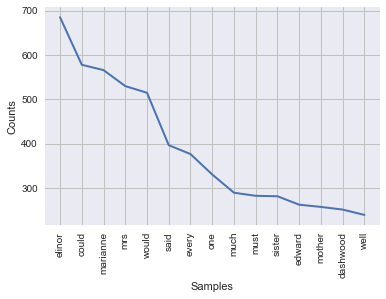

In [34]:
plot_word_freq(text2)

In [49]:
r = requests.get("https://www.mulesoft.com/resources/esb/enterprise-application-integration-eai-and-esb") # Make the request and check object type
html = r.text # Extract HTML from Response object
soup = BeautifulSoup(html, "html5lib") # Create a BeautifulSoup object from the HTML
text = soup.get_text() # Get the text out of the soup
text

'\n  \n(window.NREUM||(NREUM={})).loader_config={xpid:"VQYDVF5aCBADU1NVAwQBVA=="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(20),c={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(c.console=!0,o.indexOf("dev")!==-1&&(c.dev=!0),o.indexOf("nr_dev")!==-1&&(c.nrDev=!0))}catch(s){}c.nrDev&&i.on("internal-error",function(t){r(t.stack)}),c.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),c.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(c,function(t,e){return t}).join(", ")))},{}],2:[function(t,e,n){function r(t,e,n,r,c){try{h?h-=1:o(c||new UncaughtException(t,e,n),!0)}catch(f){try{i("ierr",[

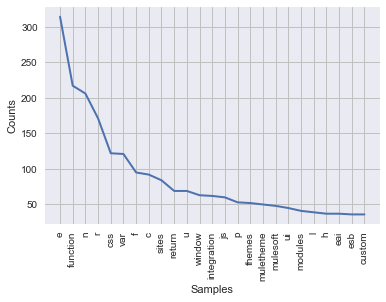

In [47]:
plot_word_freq1("https://www.mulesoft.com/resources/esb/enterprise-application-integration-eai-and-esb", nr = 25)

In [54]:
from functools import reduce
num = list(range(1, 11))
num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [55]:
reduce(lambda x, y: x + y, num)

55

In [56]:
sum(num)

55